In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

aqui inportamos librerias

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/anshulvirulkar/Python-libraries/main/airlines_flights_data.csv")

Esa línea de código sirve para cargar un archivo CSV desde Internet y convertirlo en un DataFrame de pandas

In [ ]:
df.shape # Tamaño del dataset (filas, columnas)

(300153, 12)

En este dataframe airlens data esto contiene 300153 columnas de informacion y 12 filas que almacenan la informacion

In [ ]:
df.info()  #Numéricos, categóricos, fechas, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


bueno en ese df info tenemos como Información general

Filas: 300,153

Columnas: 12

Tipos de datos: 3 int64, 1 float64, 8 object

Valores nulos: ningunoColumnas
index – int64 – Identificador de fila (no información del vuelo).

airline – object – Nombre de la aerolínea.

flight – object – Código o número de vuelo.

source_city – object – Ciudad de origen.

departure_time – object – Hora de salida (conviene pasar a datetime).

stops – object – Número de escalas (ej: “non-stop”, “1 stop”).

arrival_time – object – Hora de llegada (conviene pasar a datetime).

destination_city – object – Ciudad de destino.

class – object – Clase del boleto (Economy, Business).

duration – float64 – Duración del vuelo.

days_left – int64 – Días restantes hasta la salida.

price – int64 – Precio del boleto

y bueno en Resumen
Numéricas: index, duration, days_left, price
Categóricas: airline, flight, source_city, departure_time, stops, arrival_time,destination_city, class
Fechas (a convertir): departure_time, arrival_time

In [ ]:
df.duplicated().sum()

np.int64(0)

El resultado obtenido al aplicar la función para detectar duplicados fue cero. Esto significa que el DataFrame no contiene filas repetidas y, por lo tanto, toda la información registrada es única. El tipo de dato que aparece corresponde a un entero de 64 bits, lo cual no afecta la interpretación del resultado. En conclusión, el conjunto de datos está libre de duplicados.

In [ ]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Cada fila representa un vuelo con sus características:

index: identificador de la fila.

airline: nombre de la aerolínea (SpiceJet, AirAsia, Vistara, etc.).

flight: número o código del vuelo.

source_city: ciudad de origen (en este caso, todas desde Delhi).

departure_time: franja horaria de salida (Evening, Early_Morning, Morning).

stops: número de escalas (aquí todos son “zero”, es decir, vuelos directos).

arrival_time: franja horaria de llegada (Night, Morning, Afternoon).

destination_city: ciudad de destino (todas hacia Mumbai).

class: clase del pasaje (aquí siempre Economy).

duration: duración del vuelo en horas (entre 2.17 y 2.33).

days_left: días restantes para la salida del vuelo (en este ejemplo, siempre 1).

price: precio del boleto rupias indias (₹) (entre 5953 y 5956).

Conclusión

El comando muestra un adelanto de los datos disponibles en el dataset, permitiendo ver la estructura general: vuelos entre Delhi y Mumbai, todos en clase Economy, con duración cercana a 2 horas, sin escalas, y precios similares alrededor de 5950.

In [ ]:
df.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


En este caso, todas las filas corresponden a vuelos de la aerolínea Vistara, que parten desde Chennai y tienen como destino Hyderabad. Los vuelos pertenecen a la clase Business y presentan una duración larga, entre 10 y casi 14 horas. En todos los registros aparece que falta 49 días para la salida. Los precios son elevados en comparación a los primeros registros vistos con df.head(), alcanzando valores entre 69.265 y 81.585. Además, a diferencia de los vuelos iniciales, aquí todos incluyen una escala.

En conclusión, la función muestra el final del conjunto de datos, donde se observan vuelos de mayor duración, con clase Business, precios mucho más altos y condiciones distintas a los primeros vuelos que eran cortos, económicos y directos.

In [ ]:
df.describe()  # Media, mediana, min, max, std

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


Interpretación de los resultados

count: todas las columnas tienen 300.153 registros, lo que confirma que no hay valores nulos.

index: va de 0 a 300.152 y su media está al centro (150.076), lo cual es esperable ya que es solo un identificador.

Duración (duration)

Promedio: 12.22 horas.

Desviación estándar: 7.19, lo que indica bastante variabilidad en la duración de los vuelos.

Mínimo: 0.83 horas (vuelos muy cortos).

Máximo: 49.83 horas (vuelos muy largos, posiblemente con escalas o datos atípicos).

Mediana (50%): 11.25 horas, lo que indica que la mayoría de los vuelos rondan entre 7 y 16 horas.

Días restantes (days_left)

Promedio: 26 días antes de la salida.

Desviación estándar: 13.56.

Mínimo: 1 día antes del vuelo.

Máximo: 49 días.

Mediana: 26 días, lo que muestra una distribución bastante balanceada.

Precio (price) rupias indias (₹)

Promedio: 20.889 unidades monetarias.

Desviación estándar: 22.697, lo que refleja mucha dispersión en los precios.

Mínimo: 1.105 (boletos económicos).

Máximo: 123.071 (boletos muy caros, clase alta o vuelos largos).

Mediana: 7.425, lo que indica que la mayoría de los vuelos son mucho más baratos que el promedio (la media está inflada por precios extremos).

El resumen estadístico muestra que el dataset es amplio y sin datos faltantes. La duración de los vuelos y los precios presentan alta variabilidad, con valores extremos que elevan los promedios. Los días restantes están distribuidos de forma equilibrada, con un máximo de 49 días y una mediana de 26

In [ ]:
df.describe(include='object')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


Interpretación de los resultados

count: Todas las columnas tienen 300.153 registros, por lo que no hay valores nulos.

airline

Valores únicos: 6 aerolíneas distintas.

Valor más frecuente: Vistara, con 127.859 registros.

flight

Valores únicos: 1.561 códigos de vuelo distintos.

Código más frecuente: UK-706, aparece 3.235 veces.

source_city

Valores únicos: 6 ciudades de origen.

Ciudad más frecuente: Delhi, con 61.343 registros.

departure_time

Valores únicos: 6 franjas horarias.

Franja más frecuente: Morning, con 71.146 registros.

stops

Valores únicos: 3 tipos (zero, one, etc.).

Tipo más frecuente: one, con 250.863 registros (la mayoría de los vuelos tienen una escala).

arrival_time

Valores únicos: 6 franjas horarias de llegada.

Franja más frecuente: Night, con 91.538 registros.

destination_city

Valores únicos: 6 ciudades de destino.

Ciudad más frecuente: Mumbai, con 59.097 registros.

class

Valores únicos: 2 clases (Economy y Business).

Clase más frecuente: Economy, con 206.666 registros.

El dataset está completo en sus columnas categóricas y muestra predominancia de ciertos valores: aerolínea Vistara, vuelos con una escala, salida en la mañana y clase Economy. Esto permite identificar tendencias importantes en la oferta de vuelos y sus características

<Axes: >

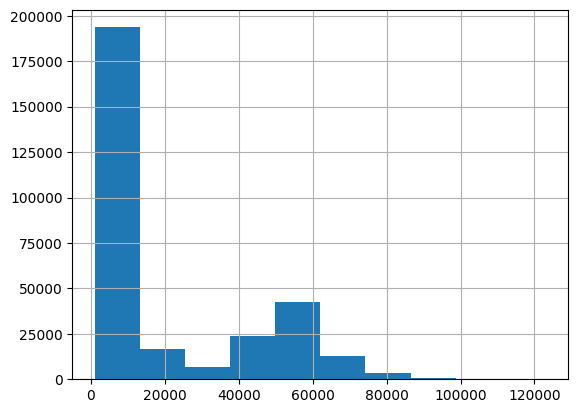

In [ ]:
df['price'].hist()  #¿Cómo se comportan los datos?

Es un histograma de los precios.
	•	Eje X: valores de precio (980 a 123.000 aprox.).
	•	Eje Y: cantidad de vuelos en cada rango.
Muestra que la mayoría de los boletos son baratos y pocos son muy caros.

In [ ]:
binnedPrice = pd.cut(df['price'], 10)  #Dividir en categorías
binnedPrice.value_counts()  # Frecuencia de categorías

,count
price,
"(983.034, 13301.6]",193661
"(49891.4, 62088.0]",42669
"(37694.8, 49891.4]",23587
"(13301.6, 25498.2]",16429
"(62088.0, 74284.6]",12638
"(25498.2, 37694.8]",6991
"(74284.6, 86481.2]",3392
"(86481.2, 98677.8]",656
"(98677.8, 110874.4]",115


Ese código sirve para clasificar la columna price en rangos (categorías) y contar cuántos vuelos caen en cada rango.

Desglose:

pd.cut(df['price'], 10) → divide los precios en 10 intervalos iguales entre el mínimo y el máximo.

binnedPrice.value_counts() → cuenta cuántos valores caen en cada intervalo.

Interpretación de los resultados:

La mayoría de los vuelos (193.661) tienen precios entre 983 y 13.301, es decir, vuelos económicos.

Los vuelos más caros son pocos: solo 15 vuelos están en el rango máximo 110.874 a 123.071.

Se observa que los precios están muy concentrados en el rango bajo y hay una distribución sesgada a la derecha, con pocos vuelos muy caros.

En conclusión, la técnica de binning permite ver de forma resumida cómo se distribuyen los precios y facilita analizar frecuencias por categorías

<Axes: >

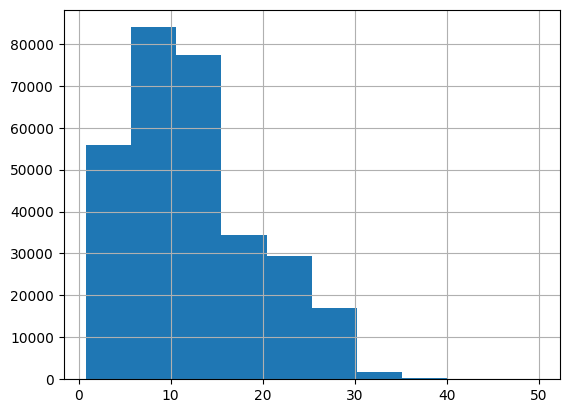

In [ ]:
df['duration'].hist()  #¿Cómo se comportan los datos?

El gráfico muestra cómo se comportan los datos a lo largo del rango analizado, evidenciando una variación que inicia en aproximadamente 50 y se extiende hasta superar los 80.000.

In [ ]:
binnedDuration = pd.cut(df['duration'], 10)  #Dividir en categorías
binnedDuration.value_counts()  # Frecuencia de categorías

,count
duration,
"(5.73, 10.63]",83952
"(10.63, 15.53]",77438
"(0.781, 5.73]",55884
"(15.53, 20.43]",34379
"(20.43, 25.33]",29929
"(25.33, 30.23]",16461
"(30.23, 35.13]",1700
"(35.13, 40.03]",362
"(40.03, 44.93]",40


<Axes: xlabel='price'>

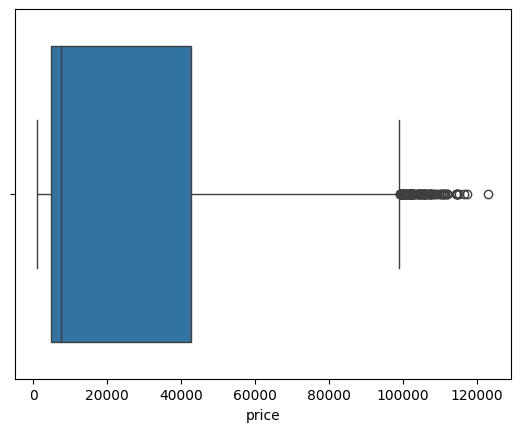

In [ ]:
sns.boxplot(x=df['price'])  #Detectar datos extremos

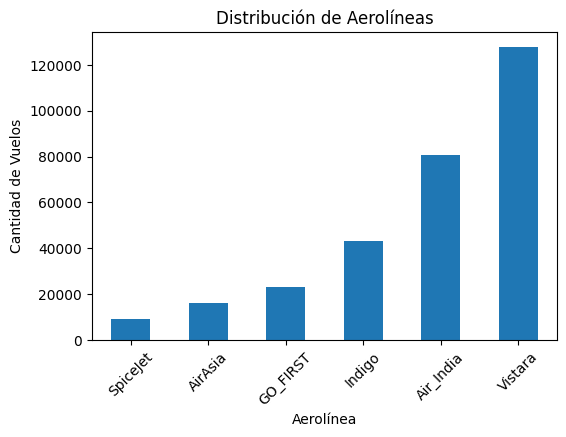

In [ ]:
# cantidad de vuelos por aerolínea
df['airline'].value_counts().sort_values().plot(kind='bar', figsize=(6,4), rot=45, title='Distribución de Aerolíneas')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad de Vuelos')
plt.show()

El gráfico permite visualizar la distribución de las aerolíneas en función de la cantidad de vuelos realizados, abarcando un rango que va desde 0 hasta 120.000, y resaltando a las compañías que registran el mayor volumen de operaciones.

In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [ ]:
df['flight'].value_counts()

,count
flight,
UK-706,3235
UK-772,2741
UK-720,2650
UK-836,2542
UK-822,2468
...,...
6E-2914,1
G8-107,1
SG-9974,1


Catidad de vuelos por código de vuelo siendo el UK-706 con 3235 vuelos con la mayor cantidad de vuelos.

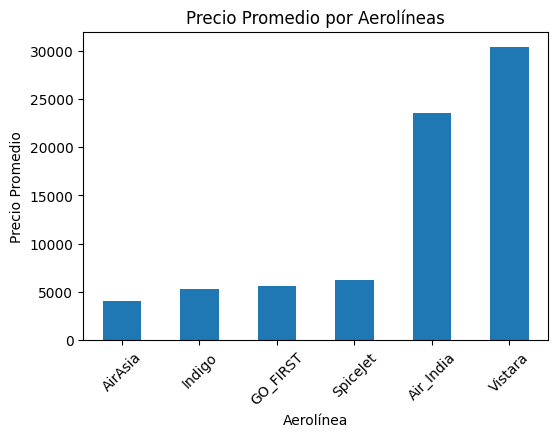

In [ ]:
# precio promedio por aerolínea
df.groupby('airline')['price'].mean().sort_values().plot(kind='bar', figsize=(6,4), rot=45, title='Precio Promedio por Aerolíneas')
plt.xlabel('Aerolínea')
plt.ylabel('Precio Promedio')
plt.show()

El gráfico muestra el precio promedio de los vuelos, el cual se encuentra en un rango que va desde 0 hasta 30.000, permitiendo comparar este valor entre las distintas aerolíneas.

In [ ]:
df.groupby('airline')['price'].value_counts()

airline  price 
AirAsia  2723      696
         3090      650
         3862      580
         3393      558
         2477      470
                  ... 
Vistara  114705      1
         115211      1
         116562      1
         117307      1
         123071      1
Name: count, Length: 17045, dtype: int64

Cantidad de pasajes reservados según cada aerolinea y el respectivo valor del vuelo, siendo la aerolinea AirAsia con 696 vuelos con un valor de 2723 rupias la mayor cantidad de vuelos reservados.

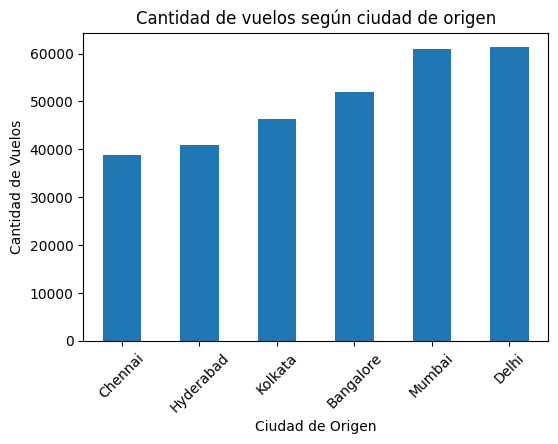

In [ ]:
# Cantidad de vuelos por ciudad de origen
df['source_city'].value_counts().sort_values().plot(kind='bar', figsize=(6,4), rot=45, title='Cantidad de vuelos según ciudad de origen')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Cantidad de Vuelos')
plt.show()

El gráfico presenta la cantidad de vuelos registrados por las distintas aerolíneas a las distintas ciudades de origen, mostrando un rango que va desde 40000 hasta 60.000.

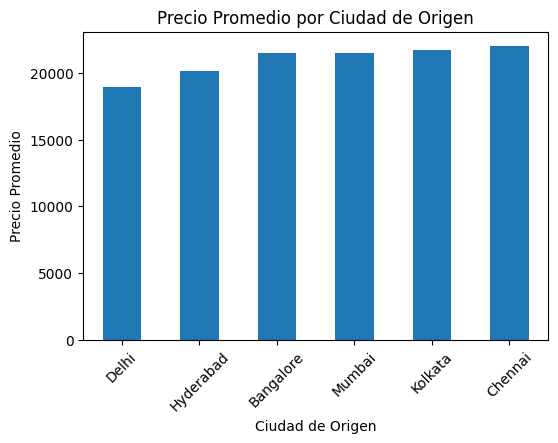

In [ ]:
# Precio promedio por ciudad origen
df.groupby('source_city')['price'].mean().sort_values().plot(kind='bar', figsize=(6,4), rot=45, title='Precio Promedio por Ciudad de Origen')
plt.xlabel('Ciudad de Origen')
plt.ylabel('Precio Promedio')
plt.show()

El gráfico permite visualizar el precio promedio de los vuelos según la ciudad de Origen, abarcando un rango de valores que va desde 18000 hasta 22.000 y destacando los diferentes destinos analizados.

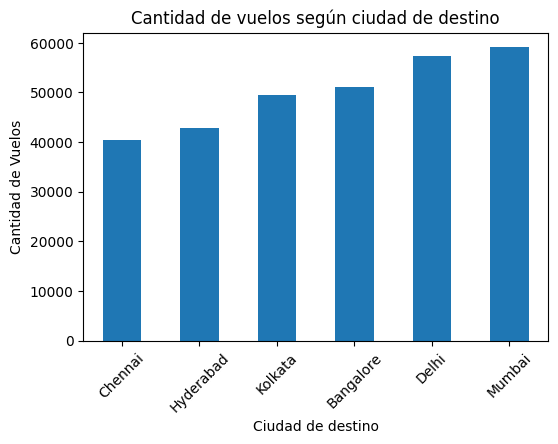

In [ ]:
# Cantidad de vuelos por ciudad de destino
df['destination_city'].value_counts().sort_values().plot(kind='bar', figsize=(6,4), rot=45, title='Cantidad de vuelos según ciudad de destino')
plt.xlabel('Ciudad de destino')
plt.ylabel('Cantidad de Vuelos')
plt.show()

El gráfico presenta la cantidad de vuelos registrados hacia las diferentes ciudades de destino, con un rango que va desde 40000 hasta 60.000.

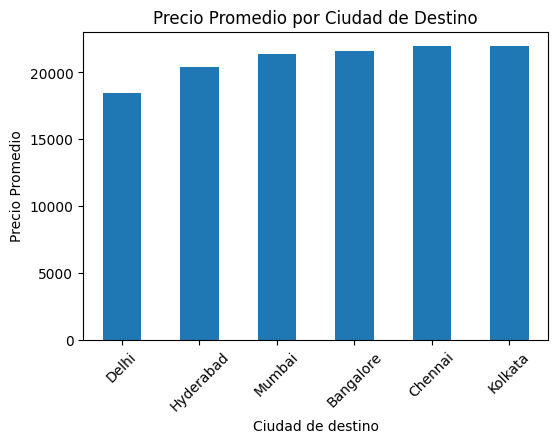

In [ ]:
# Precio promedio por ciudad destino
df.groupby('destination_city')['price'].mean().sort_values().plot(kind='bar', figsize=(6,4), rot=45, title='Precio Promedio por Ciudad de Destino')
plt.xlabel('Ciudad de destino')
plt.ylabel('Precio Promedio')
plt.show()

El gráfico presenta el precio promedio de los vuelos según la ciudad de destino, con valores que oscilan entre 18000 y 22
.000.

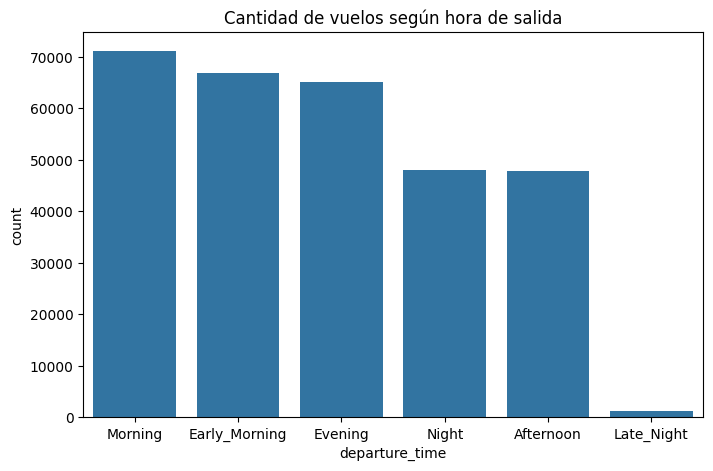

In [ ]:
# Vuelos por franja de salida
plt.figure(figsize=(8,5))
sns.countplot(x=df['departure_time'], order=df['departure_time'].value_counts().index)
plt.title("Cantidad de vuelos según hora de salida")
plt.show()

La cantidad de horario de de salida con mayor cantidad de vuelos es durante 'Morning' con aprox 70000 vuleos,  siguiendolo de 'Early Morning' con un cantidad de vuelos de 65000 y con la menor cantidad de vuelos es durante 'Late Night' con una cantidad de aprox 1000 vuelos.

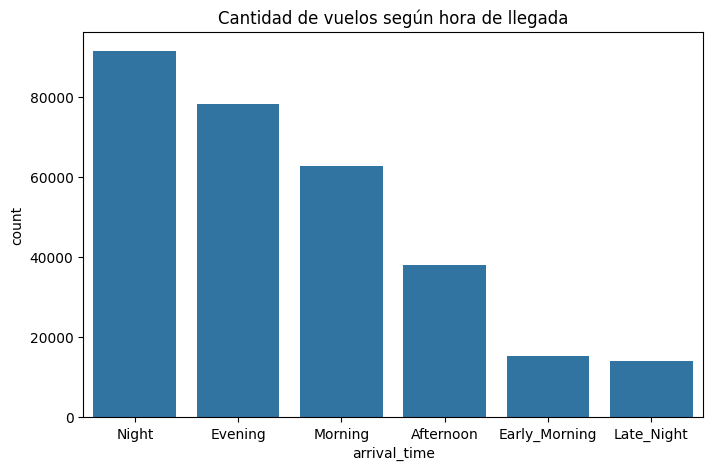

In [ ]:
#  Vuelos por franja de llegada
plt.figure(figsize=(8,5))
sns.countplot(x=df['arrival_time'], order=df['arrival_time'].value_counts().index)
plt.title("Cantidad de vuelos según hora de llegada")
plt.show()

El gráfico muestra la cantidad de vuelos según la hora de llegada ("arrival_time"). Se observa que la mayoría de los vuelos llegan durante la noche (aproximadamente 90,000), seguidos por la tarde (evening) con cerca de 78,000 vuelos y la mañana (morning) con alrededor de 63,000. Las llegadas en la tarde (afternoon) suman cerca de 38,000, mientras que las horas tempranas de la mañana (early_morning) y la noche tardía (late_night) tienen la menor cantidad, con aproximadamente 15,000 vuelos cada una.

In [ ]:
df['arrival_time'].value_counts()  #  Frecuencia de categorías

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


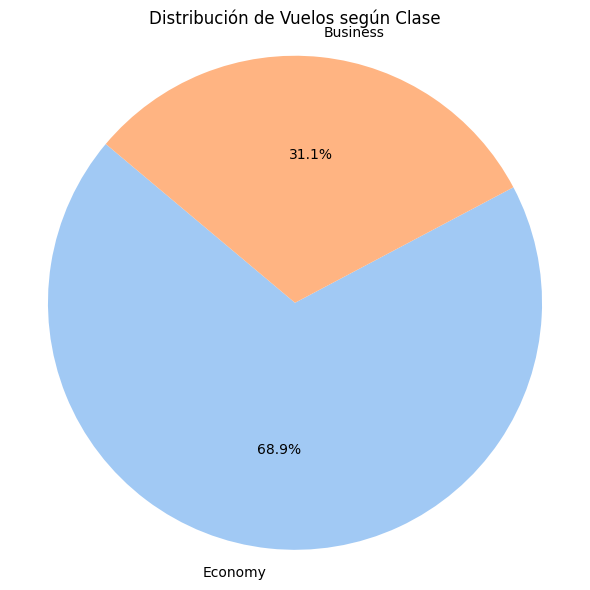

In [ ]:
# Conteo de vuelos por clase
conteo_clase = df['class'].value_counts()

# Gráfico de torta
plt.figure(figsize=(6,6))
plt.pie(conteo_clase, labels=conteo_clase.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribución de Vuelos según Clase')
plt.axis('equal')  # Para que la torta sea circular
plt.tight_layout()
plt.savefig('grafico_torta_clase.png')
plt.show()


In [ ]:
df['class'].value_counts()  #  Frecuencia de categorías

,count
class,
Economy,206666
Business,93487


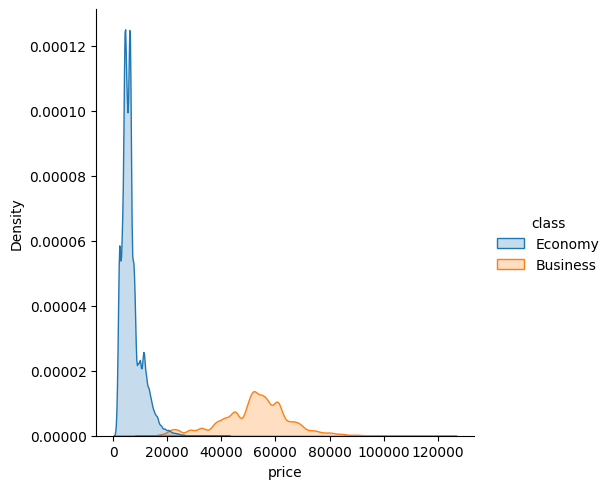

In [ ]:
sns.displot(df, x='price', hue='class', kind='kde', fill=True)

El gráfico muestra la distribución de densidad del precio de pasajes según la clase ("class"). Se observa que los precios en clase Economy están concentrados en valores bajos, principalmente por debajo de 20,000, con una densidad alta cerca de cero. En contraste, los precios en clase Business tienen una distribución más dispersa y centrada en rangos superiores, entre aproximadamente 40,000 y 70,000, con un pico de densidad en ese rango. Esto indica que los pasajes en clase Business son significativamente más costosos y menos comunes en valores bajos, a diferencia de la clase Economy.

<Axes: xlabel='airline', ylabel='price'>

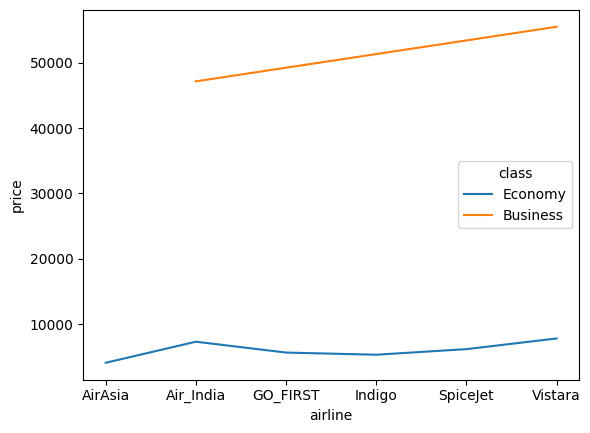

In [ ]:
# Agregar datos: precio promedio por aerolínea y clase
df_agg = df.groupby(['airline', 'class'])['price'].mean().reset_index()
sns.lineplot(data=df_agg, x='airline', y='price', hue='class')

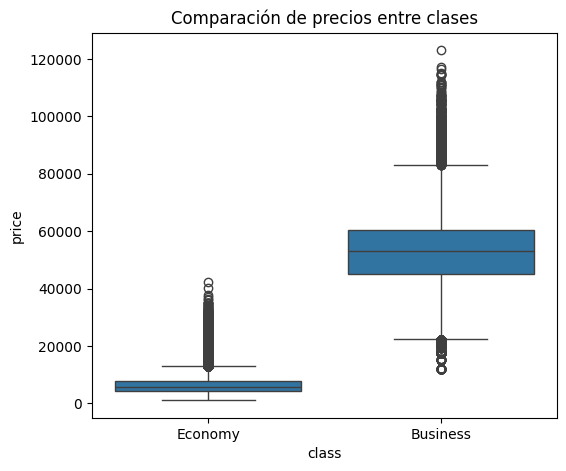

In [ ]:
# 10. Comparación de precios por clase
plt.figure(figsize=(6,5))
sns.boxplot(x='class', y='price', data=df)
plt.title("Comparación de precios entre clases")
plt.show()
